In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use(['ggplot'])
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
file_path = "C:\\Users\\sures\\OneDrive\\Documents\\Data Science\\Data Sets\\Loan Prediction Analytics Vidhya Hackathon\\train_ctrUa4K.csv"
df = pd.read_csv(file_path)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.drop("Loan_ID",axis = 1,inplace = True)

In [7]:
df.size

7368

In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Missing Values Analysis**

In [9]:
df.isnull()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in the data

So first we divide the data into categorical amd numerical columns

By dividing we can fill the missing values easily

In [11]:
num = df.select_dtypes(include = ["float64","int64"]).columns
cat = df.select_dtypes(include = ["object"]).columns

print("The numerical columns are : ",num)
print("The Categorical columns are : ",cat)

print(f"Count of num is : {len(num)}" )
print(f"Count of cat is : {len(cat)}")


The numerical columns are :  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
The Categorical columns are :  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Count of num is : 5
Count of cat is : 7


In [12]:
for i in num:
    df[i] = df[i].fillna(df[i].mean())
    

In [13]:
for i in cat:
    df[i] = df[i].fillna(df[i].mode()[0])

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Outlier Analysis**

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


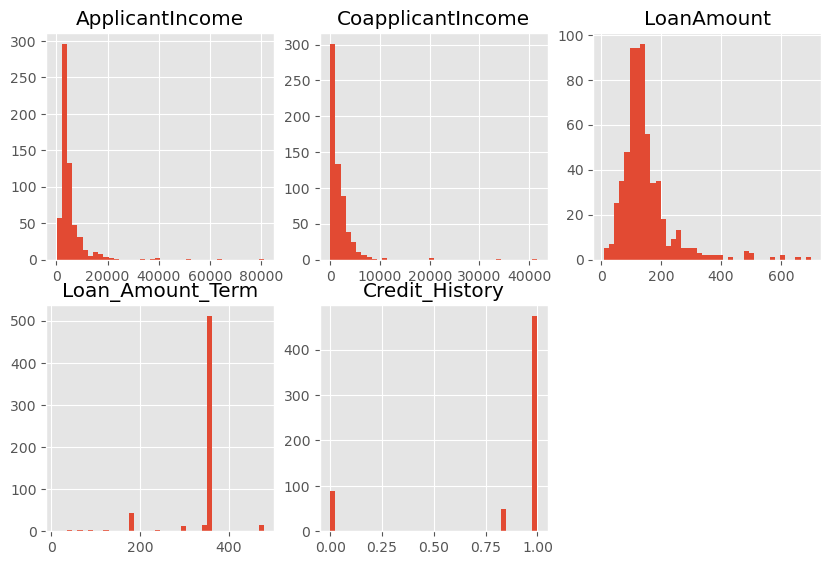

In [16]:
plt.figure(figsize=(10,10))
for i,column in enumerate(num):
    plt.subplot(3,3,i+1)
    plt.title(column)
    plt.hist(df[column],bins=40)
plt.show()


In [17]:
#Percentile Concept

for i in num:
    p1 = np.percentile(df[i],25)
    p2 = np.percentile(df[i],50)
    p3 = np.percentile(df[i],75)
    
    print(i,"p1 :",p1)
    print(i,"p2 :",p2)
    print(i,"p3 :",p3)
    print("--------------------------")
    
    
#25% or 25p means 25 percent data is below that value 

ApplicantIncome p1 : 2877.5
ApplicantIncome p2 : 3812.5
ApplicantIncome p3 : 5795.0
--------------------------
CoapplicantIncome p1 : 0.0
CoapplicantIncome p2 : 1188.5
CoapplicantIncome p3 : 2297.25
--------------------------
LoanAmount p1 : 100.25
LoanAmount p2 : 129.0
LoanAmount p3 : 164.75
--------------------------
Loan_Amount_Term p1 : 360.0
Loan_Amount_Term p2 : 360.0
Loan_Amount_Term p3 : 360.0
--------------------------
Credit_History p1 : 1.0
Credit_History p2 : 1.0
Credit_History p3 : 1.0
--------------------------


In [18]:
#Quantile concept

for i in num:
    q1 = np.quantile(df[i],.25)
    q2 = np.quantile(df[i],.50)
    q3 = np.quantile(df[i],.75)
    
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',q3)
    print('-----------------')

ApplicantIncome q1: 2877.5
ApplicantIncome q2: 3812.5
ApplicantIncome q3: 5795.0
-----------------
CoapplicantIncome q1: 0.0
CoapplicantIncome q2: 1188.5
CoapplicantIncome q3: 2297.25
-----------------
LoanAmount q1: 100.25
LoanAmount q2: 129.0
LoanAmount q3: 164.75
-----------------
Loan_Amount_Term q1: 360.0
Loan_Amount_Term q2: 360.0
Loan_Amount_Term q3: 360.0
-----------------
Credit_History q1: 1.0
Credit_History q2: 1.0
Credit_History q3: 1.0
-----------------


To know the outliers we use Boxplot

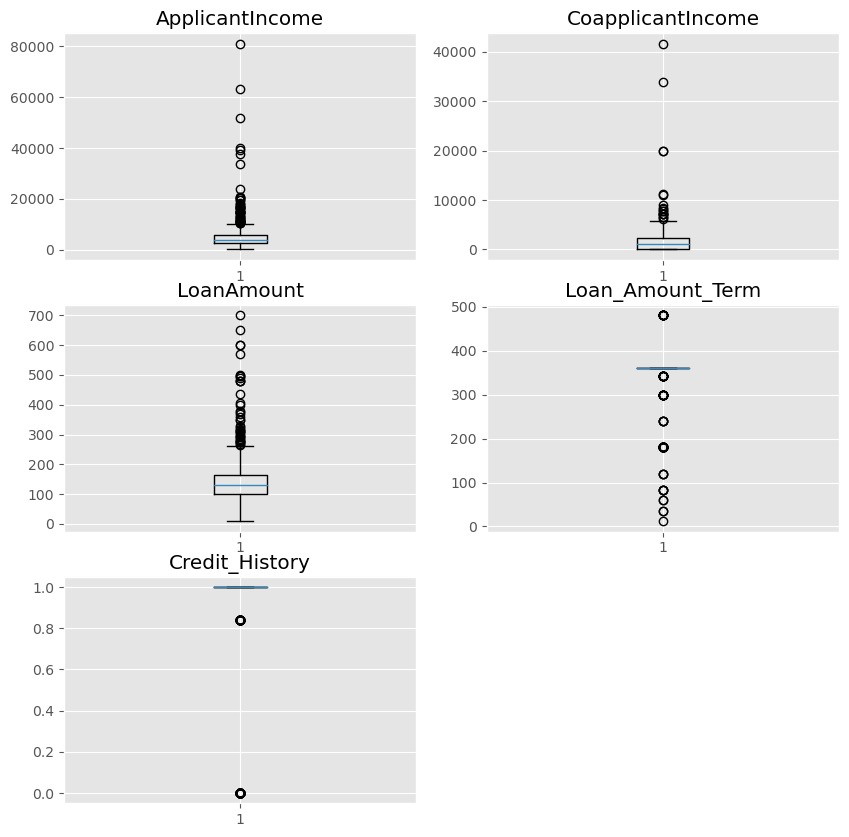

In [19]:
plt.figure(figsize = (10,10))
for i , column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [20]:
q1 = np.quantile(df["ApplicantIncome"],.25)
q2 = np.quantile(df["ApplicantIncome"],.50)
q3 = np.quantile(df["ApplicantIncome"],.75)

Iqr = q3-q1

ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)

cond1 = df["ApplicantIncome"]>ub
cond2 = df["ApplicantIncome"]<lb

outlier_df1 = df[cond1|cond2]

In [21]:
len(outlier_df1)

50

In [22]:
v1 = (len(outlier_df1)/len(df))*100
v1



8.143322475570033

In [23]:
df['ApplicantIncome']=np.where((df['ApplicantIncome']<lb) | (df['ApplicantIncome']>ub),df['ApplicantIncome'].median(),df['ApplicantIncome'])

<Axes: >

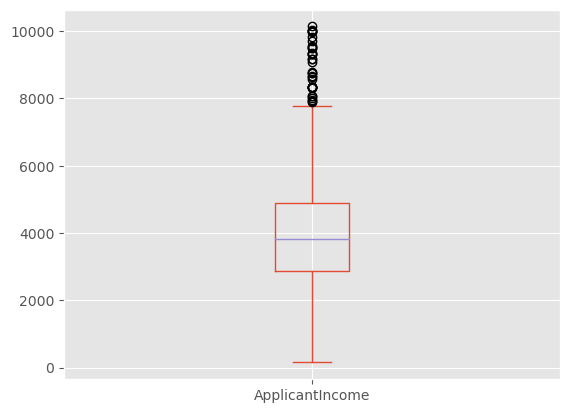

In [24]:
df.ApplicantIncome.plot.box()

In [25]:
#checking whether outliers or not

df[df.ApplicantIncome>ub]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [26]:
# #removing of outliers using zscore

# from scipy import stats

# column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# zscore = np.abs(stats.zscore(df[column]))

# threshold = 3

# outlier_indices = np.where(zscore>threshold)[0]

# df[column] = df[column].drop(df[column].index[outlier_indices])

In [27]:
q1 = np.quantile(df["CoapplicantIncome"],.25)
q2 = np.quantile(df["CoapplicantIncome"],.50)
q3 = np.quantile(df["CoapplicantIncome"],.75)

Iqr = q3-q1

ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)

cond1 = df["CoapplicantIncome"]>ub
cond2 = df["CoapplicantIncome"]<lb

outlier_df2 = df[cond1|cond2]
len(outlier_df2)

18

In [28]:
df["CoapplicantIncome"] = np.clip(df["CoapplicantIncome"],ub,lb)

In [29]:
df[df.CoapplicantIncome>lb]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


<Axes: >

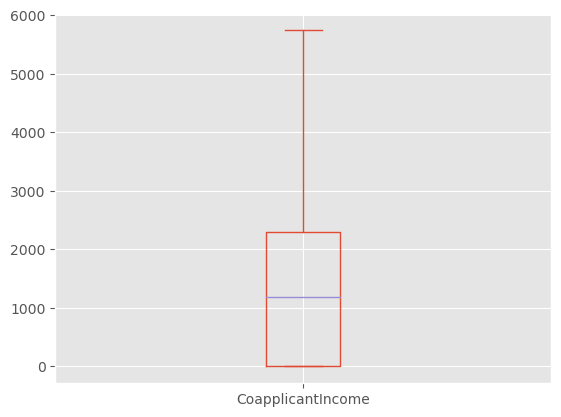

In [30]:
df.CoapplicantIncome.plot.box()

In [31]:
q1 = np.quantile(df["LoanAmount"],.25)
q2 = np.quantile(df["LoanAmount"],.50)
q3 = np.quantile(df["LoanAmount"],.75)

Iqr = q3-q1

ub = q3+(1.5*Iqr)
lb = q1-(1.5*Iqr)

cond1 = df["LoanAmount"]>ub
cond2 = df["LoanAmount"]<lb

outlier_df3 = df[cond1|cond2]

In [32]:
df[df.LoanAmount>lb]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


<Axes: >

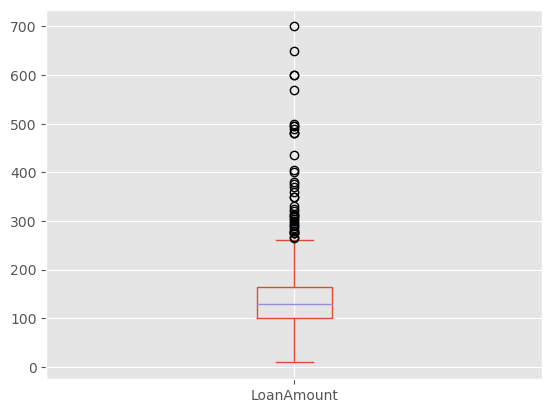

In [33]:
df.LoanAmount.plot.box()

<Axes: >

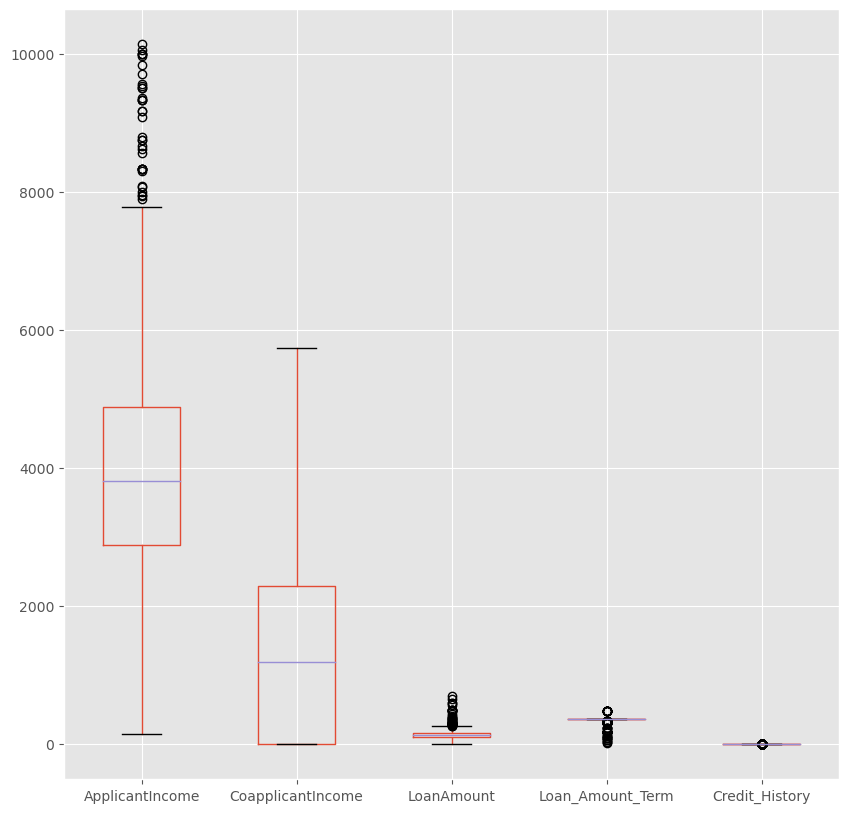

In [34]:
plt.figure(figsize = (10,10))
df.boxplot()

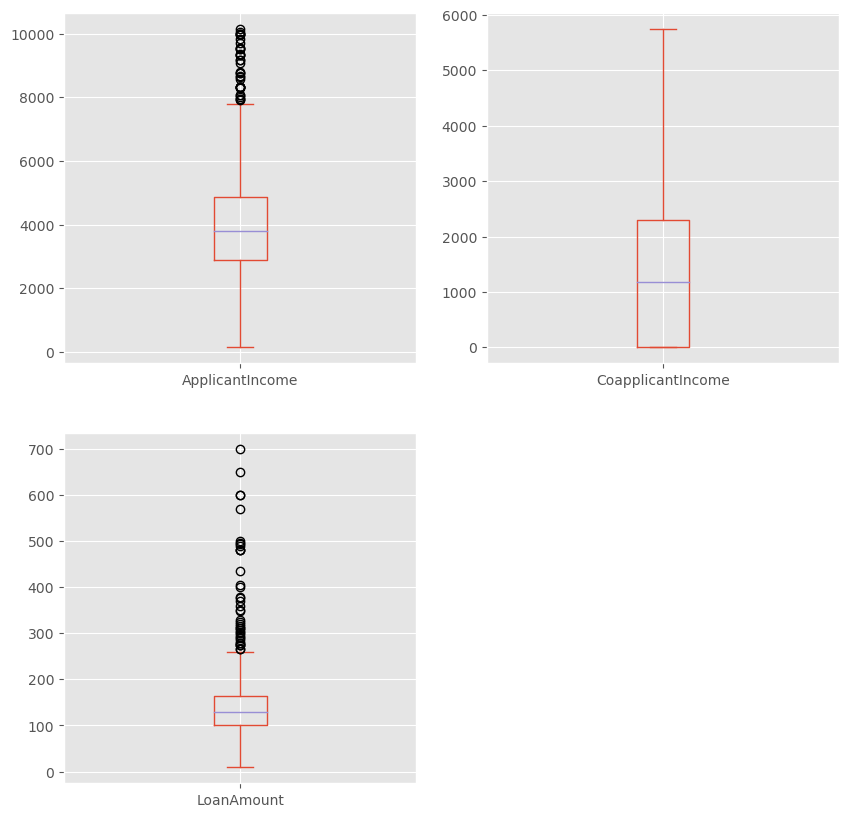

In [35]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
df.ApplicantIncome.plot.box()
plt.subplot(2,2,2)
df.CoapplicantIncome.plot.box()
plt.subplot(2,2,3)
df.LoanAmount.plot.box()
plt.show()

**Data Transformtion -- Skewed to Normal**

In [36]:
from scipy.stats import skew , boxcox

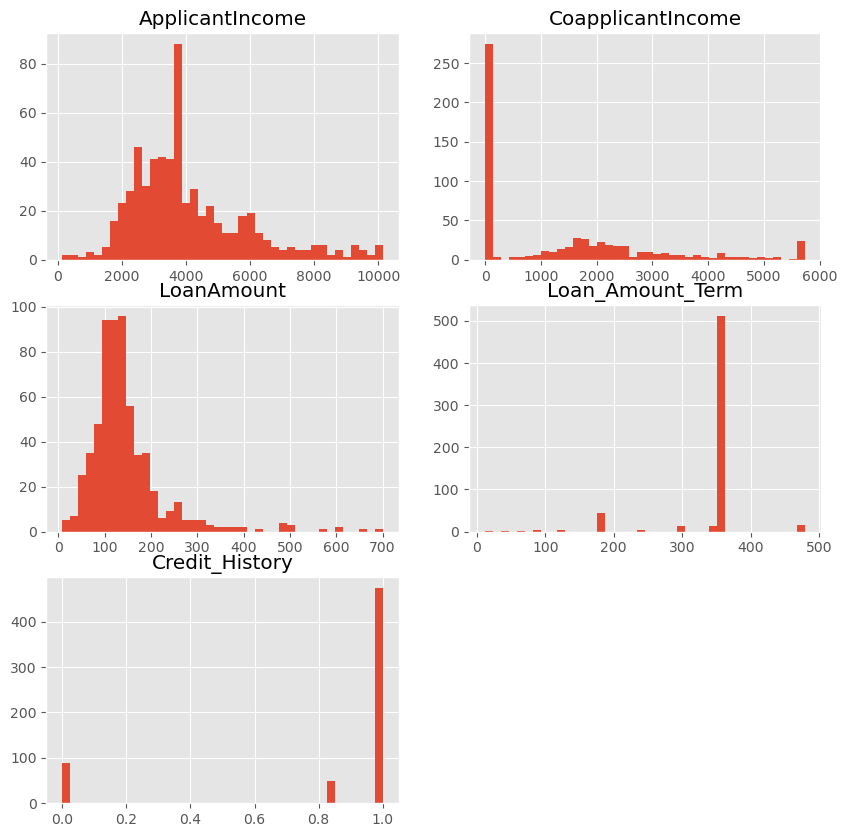

In [37]:
plt.figure(figsize = (10,10))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.hist(df[column],bins=40)
plt.show()

In [38]:
log_data = np.log(df["ApplicantIncome"])
print("The skewness after log transformation is : ",skew(log_data))

The skewness after log transformation is :  -1.0419844372769722


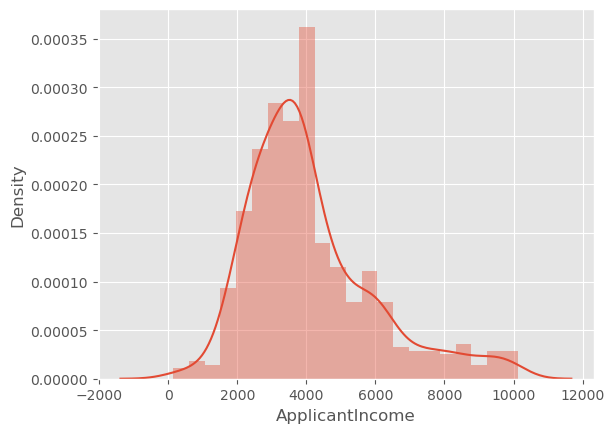

In [39]:
sns.distplot(df["ApplicantIncome"])
plt.show()

In [40]:
df["ApplicantIncome"] = np.sqrt(df["ApplicantIncome"])
print("The skewness after log transformation is : ",skew(df["ApplicantIncome"]))

The skewness after log transformation is :  0.4369769861524096


In [41]:
df["ApplicantIncome"].skew()

0.43804786269750456

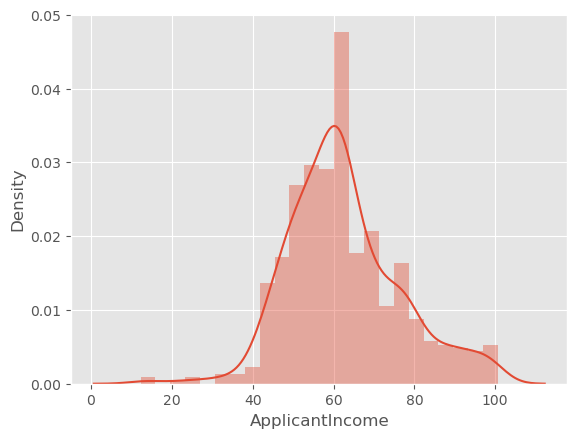

In [42]:
sns.distplot(df["ApplicantIncome"])
plt.show()

In [43]:
df["ApplicantIncome"].skew()

0.43804786269750456

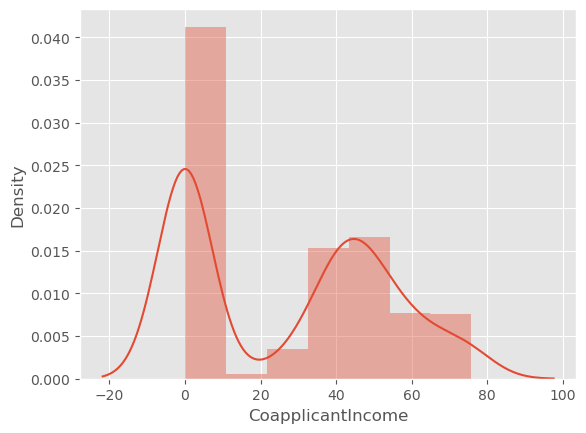

0.19282967978686388


In [44]:
df["CoapplicantIncome"] = np.sqrt(df["CoapplicantIncome"])
sns.distplot(df["CoapplicantIncome"])
plt.show()

print(df["CoapplicantIncome"].skew())

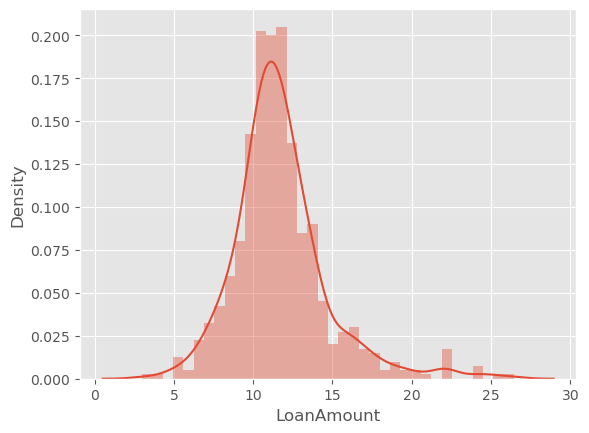

1.3141619498030808


In [45]:
df["LoanAmount"] = np.sqrt(df["LoanAmount"])
sns.distplot(df["LoanAmount"])
plt.show()

print(df["LoanAmount"].skew())

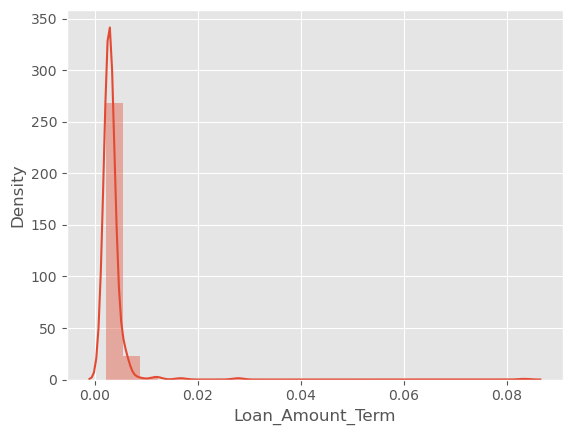

16.748053628770066


In [46]:
df["Loan_Amount_Term"] = 1/df["Loan_Amount_Term"]
sns.distplot(df["Loan_Amount_Term"])
plt.show()

print(df["Loan_Amount_Term"].skew())

#coz it has discrete values

**Bivariate and Multivariate**

In [47]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
col1 = df["Gender"]
col2 = df["Loan_Status"]
output = pd.crosstab(col1,col2)
output

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


<Figure size 500x500 with 0 Axes>

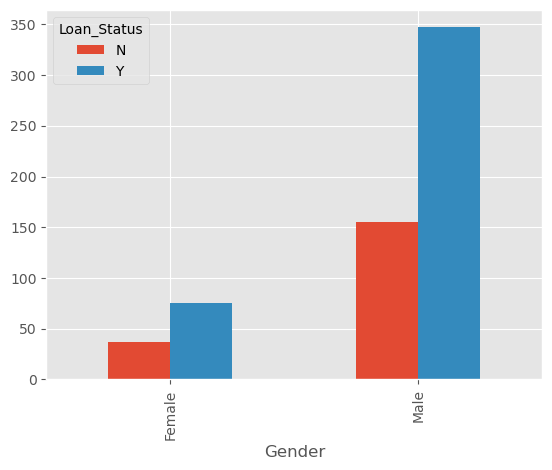

In [49]:
plt.figure(figsize=(5,5))
output.plot(kind = "bar")
plt.show()

In [50]:
col1 = df["Gender"]
col2 = df["Married"]
col3 = df["Loan_Status"]

result = pd.crosstab([col1,col2],col3)
result

Loan_Status       N    Y
Gender Married          
Female No        29   51
       Yes        8   24
Male   No        50   83
       Yes      105  264

<Figure size 800x800 with 0 Axes>

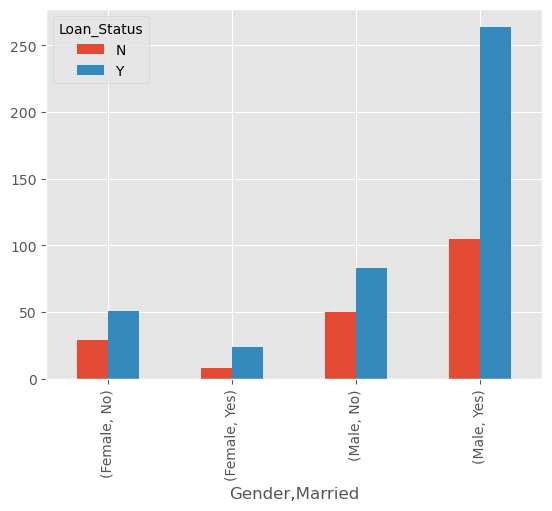

In [51]:
plt.figure(figsize=(8,8))
result.plot(kind = 'bar')
plt.show()

**Numerical vs Numerical**

In [52]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

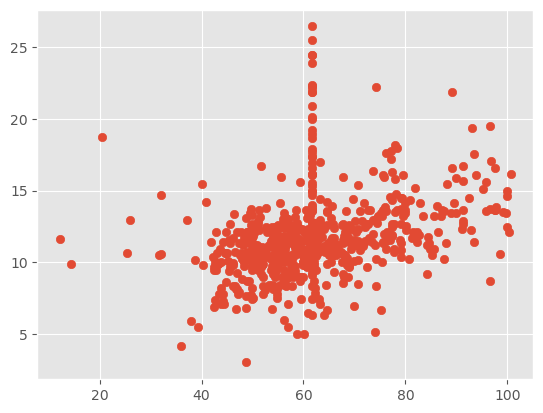

In [53]:
plt.scatter(df["ApplicantIncome"],df["LoanAmount"])
plt.show()

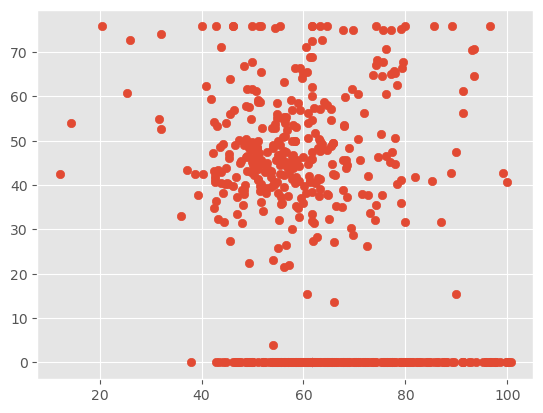

In [54]:
plt.scatter(df["ApplicantIncome"],df["CoapplicantIncome"])
plt.show()

**Conversion of Categorical Columns to Numerical**

In [55]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [56]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [57]:
LE = LabelEncoder()

for i in cat:
    
    df[i]= LE.fit_transform(df[i])

In [58]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.100089,0.002778,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,0.002778,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,0.002778,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,0.002778,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,0.002778,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,53.851648,0.000000,8.426150,0.002778,1.0,0,1
610,1,1,3,0,0,64.078077,0.000000,6.324555,0.005556,1.0,0,1
611,1,1,1,0,0,89.844310,15.491933,15.905974,0.002778,1.0,2,1
612,1,1,2,0,0,87.080423,0.000000,13.674794,0.002778,1.0,2,1


**Correlation**

In [59]:
corr = df[num].corr()
corr


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.274919,0.340639,0.015487,0.040996
CoapplicantIncome,-0.274919,1.000000,0.164619,0.016593,-0.006961
LoanAmount,0.340639,0.164619,1.000000,-0.041215,-0.014169
Loan_Amount_Term,0.015487,0.016593,-0.041215,1.000000,0.013420
Credit_History,0.040996,-0.006961,-0.014169,0.013420,1.000000


<Axes: >

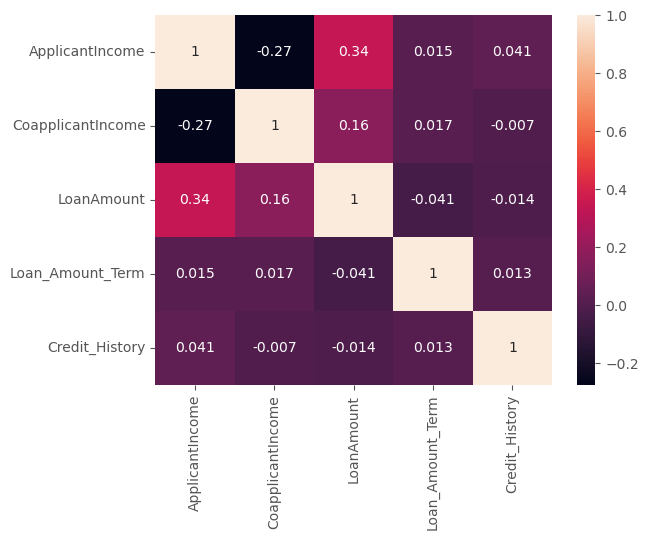

In [60]:
sns.heatmap(corr,annot = True)

**Divide the data into two parts : Input and Output**

In [61]:
X = df.drop("Loan_Status",axis = 1)
y = df["Loan_Status"]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=42,
                                                 test_size=0.2)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


**Models with out hyper parameter tuning**

$Linear-Regression$

In [64]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

- Predictions

In [65]:
y_pred_LR = LR.predict(X_test)

print(y_test.values[:5])
print(y_pred_LR[:5])

[1 1 1 1 1]
[0.80926022 0.68770748 0.84860505 0.76501518 0.72523114]


- Metrics

In [66]:
R2=r2_score(y_test,y_pred_LR)
MSE=mean_squared_error(y_test,y_pred_LR)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-sqaure: 0.2590804608748998
MSE: 0.16846871667594318
RMSE: 0.4104494081807686


In [67]:
LR.coef_
print("The coeffiecnt of Years_of_experience is:",LR.coef_)

The coeffiecnt of Years_of_experience is: [-5.61107137e-02  9.15984415e-02  1.64926914e-02 -4.74337072e-02
  1.91819522e-02  2.22350458e-03  1.44733424e-03 -1.53806231e-02
 -2.54591736e+00  7.12875423e-01  1.92289807e-02]


In [68]:
LR.intercept_

0.06907179585290257

$Logistic-Regression$

In [69]:
LRtree = LogisticRegression()
LRtree.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred_LRtree = LRtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_LRtree[:5])



[1 1 1 1 1]
[1 1 1 1 1]


- Metrics

In [71]:
acc_log= round(accuracy_score(y_test,y_pred_LRtree)*100,2)
f1_log=round(f1_score(y_test,y_pred_LRtree),2)
precision_log=round(precision_score(y_test,y_pred_LRtree),2)
recall_log=round(recall_score(y_test,y_pred_LRtree),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 78.86
F1 is: 0.86
Precision is: 0.76
Recall is: 0.99


[[18 25]
 [ 1 79]]


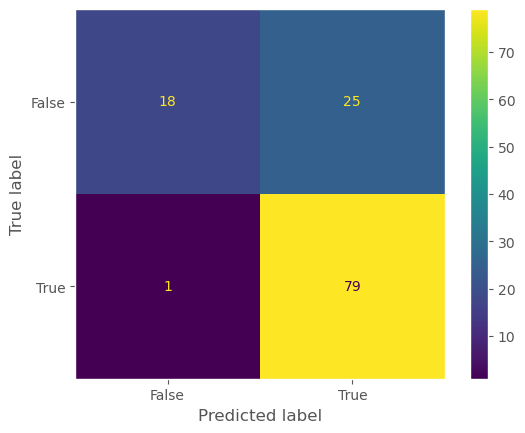

18 25 1 79
True Negative:  18
False Positive:  25
False negative:  1
True positive:  79


In [72]:
# confusion matrix 

cmt = confusion_matrix(y_test,y_pred_LRtree)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_LRtree).ravel()
print(tn, fp, fn, tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False negative: ",fn)
print("True positive: ",tp)

In [73]:
df.shape

(614, 12)

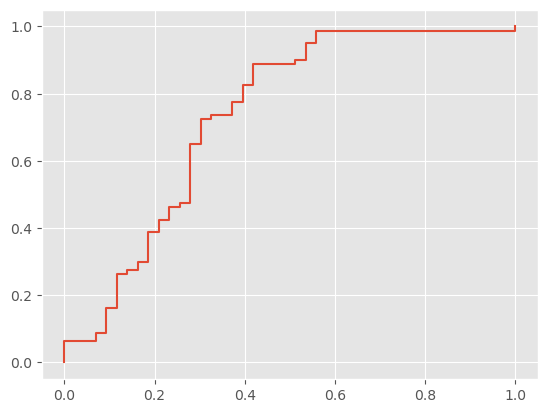

In [74]:
#--------------ROC-AUC curve

y_pred_LRtree_prob = LRtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_LRtree_prob)
plt.plot(fpr,tpr)
plt.show()

$Naive-Bayes$

In [75]:
NBtree = GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [76]:
y_pred_NB = NBtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_NB[:5])





[1 1 1 1 1]
[1 1 1 1 1]


In [77]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 78.86
F1 is: 0.86
Precision is: 0.76
Recall is: 0.99


[[18 25]
 [ 1 79]]


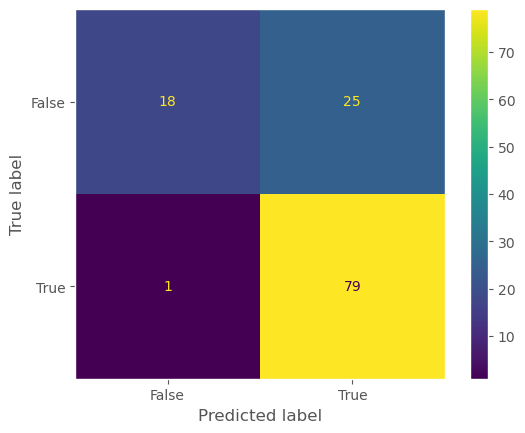

18 25 1 79
True Negative:  18
False Positive:  25
False negative:  1
True positive:  79


In [78]:
cmt = confusion_matrix(y_test,y_pred_NB)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print(tn, fp, fn, tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False negative: ",fn)
print("True positive: ",tp)

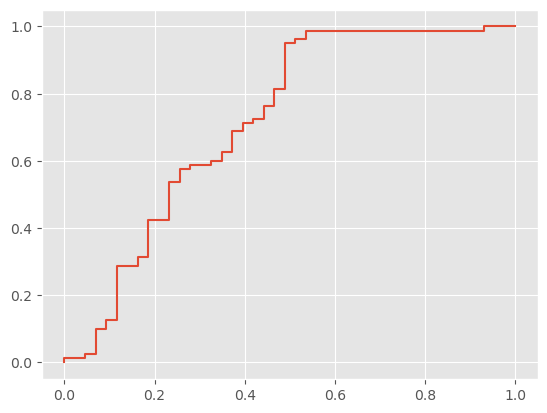

In [79]:
y_pred_NB_prob = NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_NB_prob)
plt.plot(fpr,tpr)
plt.show()

$KNN$

In [80]:
KNNtree = KNeighborsClassifier()
KNNtree.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred_KNN = KNNtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_KNN[:5])



[1 1 1 1 1]
[1 1 1 1 1]


In [82]:
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 57.72
F1 is: 0.72
Precision is: 0.63
Recall is: 0.84


[[ 4 39]
 [13 67]]


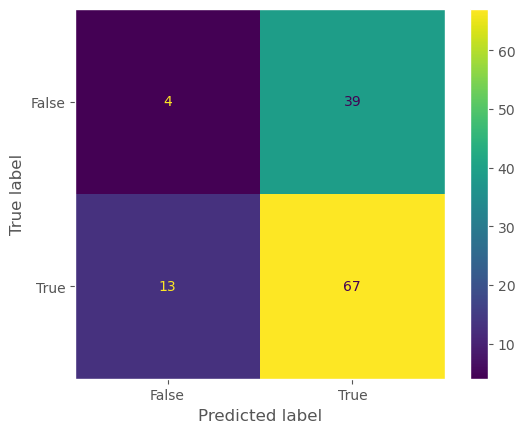

True negative: 4
False postive: 39
False negative: 13
True postive: 67


In [83]:
cmt = confusion_matrix(y_test,y_pred_KNN)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

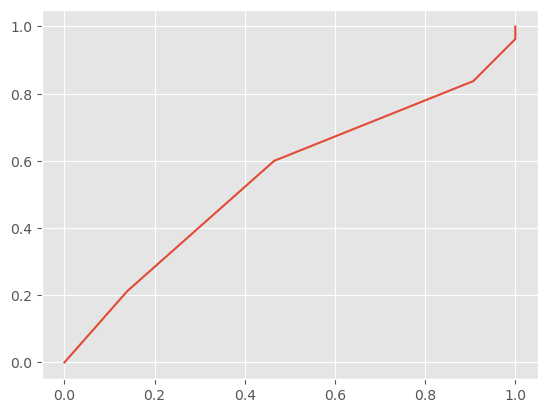

In [84]:
y_pred_KNN_prob = KNNtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_KNN_prob)
plt.plot(fpr,tpr)
plt.show()

$Random-Forest$

In [85]:
RFtree = RandomForestClassifier()
RFtree.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred_RF = RFtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_RF[:5])





[1 1 1 1 1]
[1 1 1 0 1]


In [87]:
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 75.61
F1 is: 0.83
Precision is: 0.75
Recall is: 0.94


[[18 25]
 [ 5 75]]


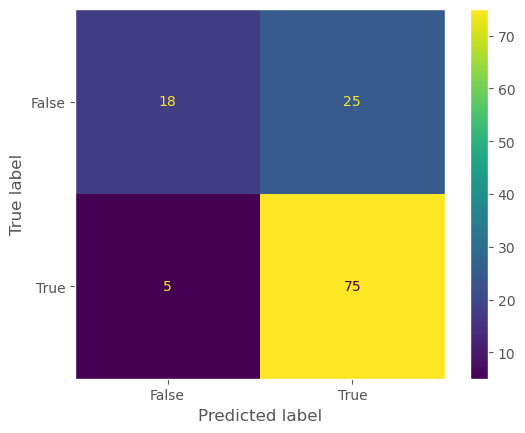

True negative: 18
False postive: 25
False negative: 5
True postive: 75


In [88]:
cmt = confusion_matrix(y_test,y_pred_RF)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels={False,True})
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

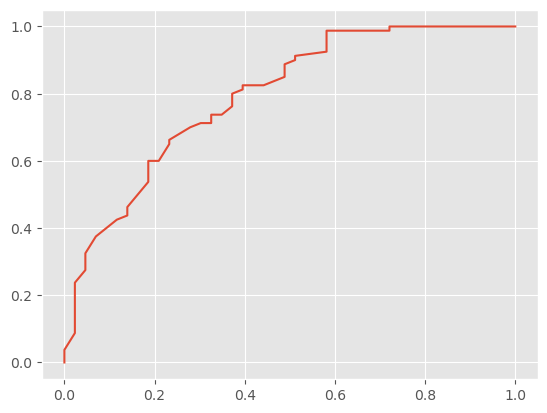

In [89]:
y_pred_RF_prob = RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_RF_prob)
plt.plot(fpr,tpr)
plt.show()

$Decision-Tree$

In [90]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred_dt = dtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_dt[:5])

[1 1 1 1 1]
[1 0 0 1 1]


In [92]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

accuray is: 68.29
F1 is: 0.77
Precision is: 0.74
Recall is: 0.8


[[20 23]
 [16 64]]


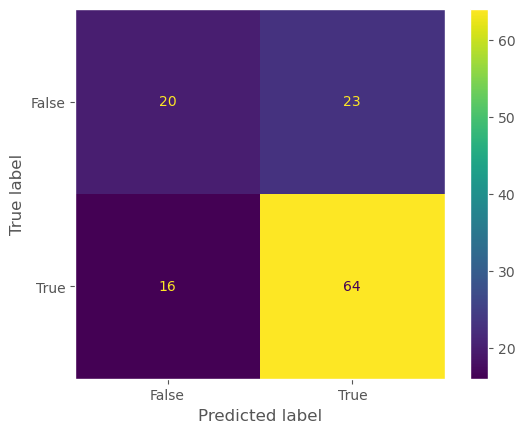

True negative: 20
False postive: 23
False negative: 16
True postive: 64


In [93]:
cmt = confusion_matrix(y_test,y_pred_dt)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

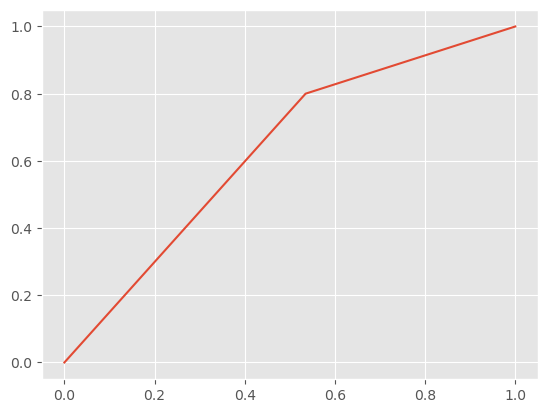

In [94]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

In [95]:
dict11={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict11,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,68.29,0.74,0.80,0.77
KNN,57.72,0.63,0.84,0.72
Logistic,78.86,0.76,0.99,0.86
Naive Bayes,78.86,0.76,0.99,0.86
Random Forest,75.61,0.75,0.94,0.83


**With Hyper Parameter Tuning**

$Decision-Tree$

In [96]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [97]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [98]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [99]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[2,3,4],
    'random_state':[0,42]
}

In [100]:
grid_search = GridSearchCV(dtree,param_grid,cv=4)
grid_search

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

In [101]:
import time

start = time.time()

grid_search.fit(X_train,y_train)

end = time.time()

print("The Task completion time is : ",(end-start))

The Task completion time is :  9.92310881614685


In [102]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)

In [103]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0}

In [104]:
grid_search.best_score_

0.8065273890443824

**Developing Decison tree with best parameters**

In [105]:
dtree = DecisionTreeClassifier(criterion = 'gini',
 max_depth = 4,
 min_samples_leaf = 2,
 min_samples_split = 2,
 random_state = 0)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=0)

accuray is: 74.8
F1 is: 0.83
Precision is: 0.74
Recall is: 0.94
              precision    recall  f1-score   support

           0       0.77      0.40      0.52        43
           1       0.74      0.94      0.83        80

    accuracy                           0.75       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.75      0.75      0.72       123



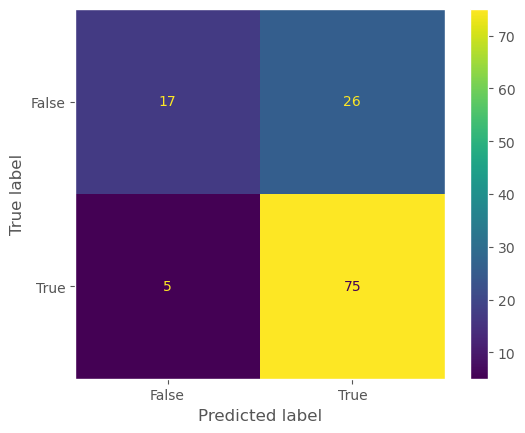

True negative: 17
False postive: 26
False negative: 5
True postive: 75


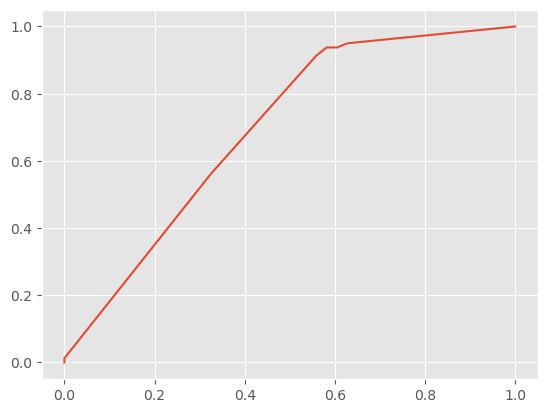

In [106]:
y_pred_dt=dtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

# ================================Step-7:Confusion matrix=========================================================================

cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

$Logistic-Regression$

In [107]:
LRtree = LogisticRegression()
LRtree

LogisticRegression()

In [108]:
LRtree.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [109]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'max_iter': [100, 500, 1000],
              'tol': [1e-4, 1e-3, 1e-2],
               'random_state' : [0,42]
}

In [110]:
grid_search = GridSearchCV(LRtree,param_grid,cv=4)
grid_search

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000], 'random_state': [0, 42],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01]})

In [111]:
start = time.time()

grid_search.fit(X_train,y_train)

end = time.time()

print("The task completion time is : ",(end-start))

The task completion time is :  53.41675853729248


In [112]:
grid_search.best_params_

{'C': 10,
 'max_iter': 100,
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001}

In [113]:
grid_search.best_estimator_

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [114]:
grid_search.best_score_

0.8146574703451953

**Developing Logistic Regression with Best parameters**

In [115]:
LRtree = LogisticRegression(C = 10,
 max_iter = 100,
 random_state =  0,
 solver = 'liblinear',
 tol = 0.0001)
LRtree.fit(X_train,y_train)
LRtree

LogisticRegression(C=10, random_state=0, solver='liblinear')

[1 1 1 1 1]
[1 1 1 1 1]
accuray is: 78.86
F1 is: 0.86
Precision is: 0.76
Recall is: 0.99
[[18 25]
 [ 1 79]]


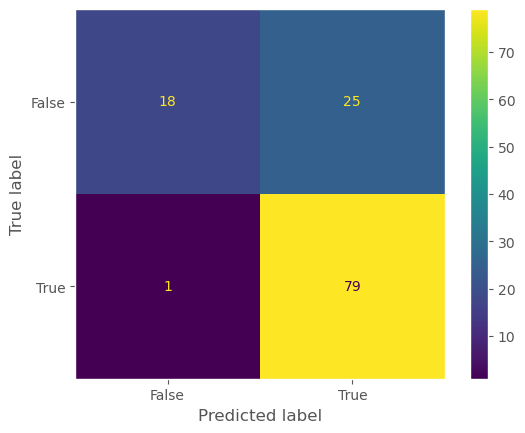

18 25 1 79
True Negative:  18
False Positive:  25
False negative:  1
True positive:  79


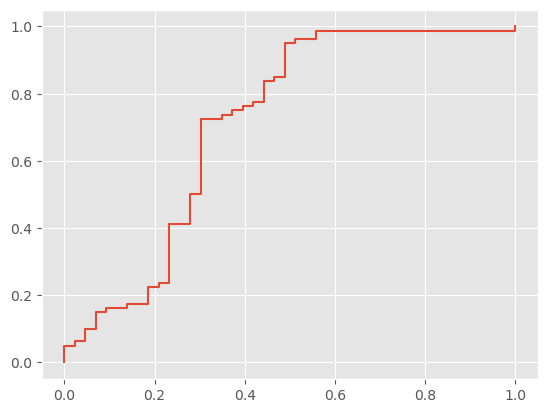

In [116]:
y_pred_LRtree = LRtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_LRtree[:5])



acc_log= round(accuracy_score(y_test,y_pred_LRtree)*100,2)
f1_log=round(f1_score(y_test,y_pred_LRtree),2)
precision_log=round(precision_score(y_test,y_pred_LRtree),2)
recall_log=round(recall_score(y_test,y_pred_LRtree),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)



# confusion matrix 

cmt = confusion_matrix(y_test,y_pred_LRtree)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_LRtree).ravel()
print(tn, fp, fn, tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False negative: ",fn)
print("True positive: ",tp)


#--------------ROC-AUC curve

y_pred_LRtree_prob = LRtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_LRtree_prob)
plt.plot(fpr,tpr)
plt.show()

$Random-Forest$

In [117]:
RFtree = RandomForestClassifier()
RFtree

RandomForestClassifier()

In [118]:
RFtree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [119]:
param_grid = {
    "criterion" : ['gini','entropy'],
    'n_estimators' : [100,200],
    "max_depth" : [3,4,5,6,7,8],
    'max_features' : ['sqrt','log2'],
#     "min_samples_split" : [2,3,4],
#     "min_samples_leaf" : [1,2,3,4],
    "random_state" : [0,42]
}

In [120]:
grid_search2 = GridSearchCV(RFtree,param_grid,cv=4)
grid_search2

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200], 'random_state': [0, 42]})

In [121]:
start = time.time()

grid_search2.fit(X_train,y_train)

end = time.time()

print("The task completion is : ",(end-start))

The task completion is :  136.1136269569397


In [122]:
grid_search2.best_estimator_

RandomForestClassifier(max_depth=3, random_state=0)

In [123]:
grid_search2.best_score_

0.8126416100226576

In [124]:
grid_search2.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

**Developing Random Forest with best parameters**

In [125]:
RFtree = RandomForestClassifier(criterion = 'gini',
 max_depth= 7,
 max_features='sqrt',
 n_estimators= 100,
 random_state= 42)

RFtree.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=42)

[1 1 1 1 1]
[1 1 1 1 1]
accuray is: 78.05
F1 is: 0.85
Precision is: 0.76
Recall is: 0.98
[[18 25]
 [ 2 78]]


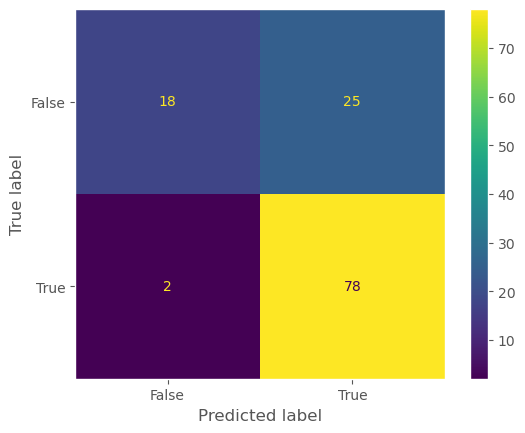

True negative: 18
False postive: 25
False negative: 2
True postive: 78


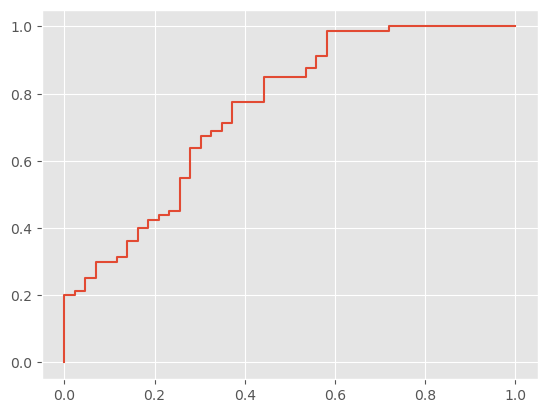

In [126]:
####################################Predictions###########################################

y_pred_RF = RFtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_RF[:5])

##################################### Metrics  ######################################

acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

######################################  COnfusion matrix   ########################


cmt = confusion_matrix(y_test,y_pred_RF)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels={False,True})
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

######################################  Roc-Auc Curve  ##########################3

y_pred_RF_prob = RFtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_RF_prob)
plt.plot(fpr,tpr)
plt.show()

$KNN$

In [127]:
KNNtree = KNeighborsClassifier()
KNNtree

KNeighborsClassifier()

In [128]:
KNNtree.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [129]:
param_grid = {
    'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [20, 30, 50],
              'p': [1, 2]
}

In [130]:
grid_search = GridSearchCV(KNNtree,param_grid,cv=2)
grid_search

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 50], 'n_neighbors': [3, 5, 7],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [131]:
start = time.time()

grid_search.fit(X_train,y_train)

end = time.time()

print("The task completion time is : ",(end-start))

The task completion time is :  7.664263963699341


In [132]:
grid_search.best_score_

0.6924755267960843

In [133]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=7, p=1)

In [134]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

**Developing the KNN Model with the best parameters**

In [135]:
KNNtree = KNeighborsClassifier(algorithm =  'ball_tree',
 leaf_size = 20,
 n_neighbors = 7,
 p = 1,
 weights = 'distance')

KNNtree.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=7, p=1,
                     weights='distance')

[1 1 1 1 1]
[1 1 1 1 1]
accuray is: 63.41
F1 is: 0.76
Precision is: 0.66
Recall is: 0.89
[[ 7 36]
 [ 9 71]]


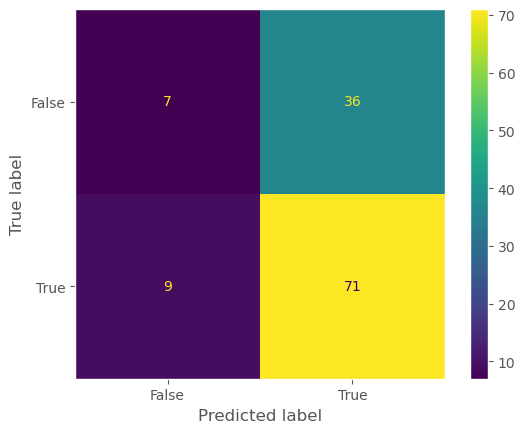

True negative: 7
False postive: 36
False negative: 9
True postive: 71


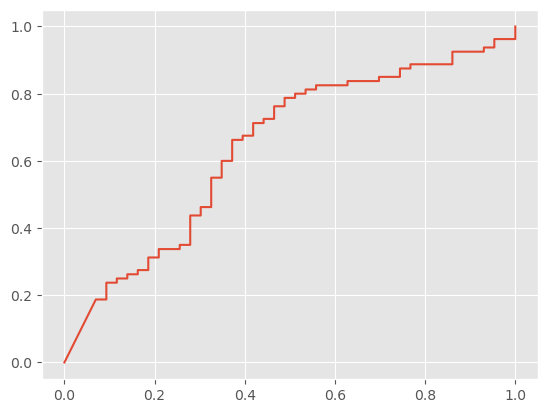

In [136]:
y_pred_KNN = KNNtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_KNN[:5])

acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)


cmt = confusion_matrix(y_test,y_pred_KNN)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


y_pred_KNN_prob = KNNtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_KNN_prob)
plt.plot(fpr,tpr)
plt.show()

$Naive-Bayes$

In [137]:
NBtree = GaussianNB()
NBtree

GaussianNB()

In [138]:
NBtree.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [139]:
param_grid = {'priors' : [0.4,0.7,None],
             'var_smoothing':[1e-10]}

In [140]:
grid_search = GridSearchCV(NBtree,param_grid,cv=4)
grid_search

GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'priors': [0.4, 0.7, None], 'var_smoothing': [1e-10]})

In [141]:
start = time.time()

grid_search.fit(X_train,y_train)

end = time.time()

print("The task Completion time is : ",(end-start))

The task Completion time is :  0.0473172664642334


In [142]:
grid_search.best_estimator_

GaussianNB(var_smoothing=1e-10)

In [143]:
grid_search.best_score_

0.8065107290417166

In [144]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 1e-10}

**Developing KNN using the Best parameters**

In [145]:
NBtree = GaussianNB(priors = None, var_smoothing = 1e-10)

NBtree.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-10)

[1 1 1 1 1]
[1 1 1 1 1]
accuray is: 78.86
F1 is: 0.86
Precision is: 0.76
Recall is: 0.99
[[18 25]
 [ 1 79]]


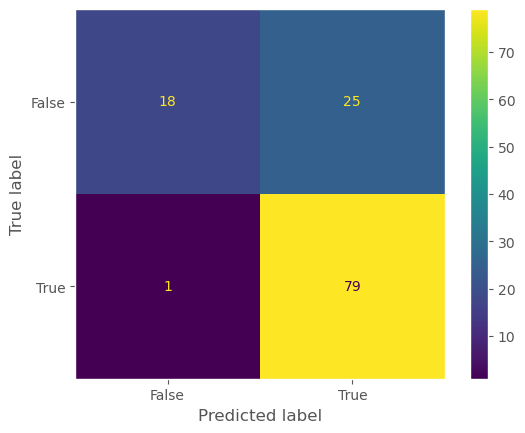

18 25 1 79
True Negative:  18
False Positive:  25
False negative:  1
True positive:  79


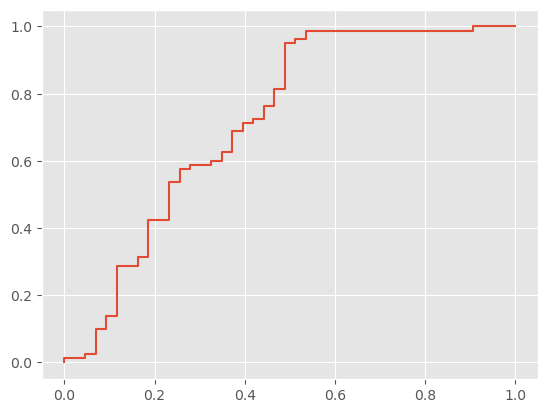

In [146]:
y_pred_NB = NBtree.predict(X_test)

print(y_test.values[:5])
print(y_pred_NB[:5])


acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)


cmt = confusion_matrix(y_test,y_pred_NB)
print(cmt)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print(tn, fp, fn, tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False negative: ",fn)
print("True positive: ",tp)


y_pred_NB_prob = NBtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_NB_prob)
plt.plot(fpr,tpr)
plt.show()

In [147]:
dict2={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict2,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,74.80,0.74,0.94,0.83
KNN,63.41,0.66,0.89,0.76
Logistic,78.86,0.76,0.99,0.86
Naive Bayes,78.86,0.76,0.99,0.86
Random Forest,78.05,0.76,0.98,0.85


In [148]:
import pickle
pickle.dump(RFtree,open('loan_train_model_best','wb'))

In [149]:
df.shape

(614, 12)

In [150]:
grid_search2.predict([[1,2,3,4,5,6,7,8,9,10,11]])

array([1])